#### **🛩 Import libraries and dataset**
****

1. Import libraries necessary and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier




    1. Write the code that imports the train and test datasets (hint: use pd.read_csv) and assign it to a variables train and test (hint: Notebook path is 'https://raw.githubusercontent.com/MagisV/Airline-Passenger-Satisfaction-Data/main/train.csv' and https://raw.githubusercontent.com/MagisV/Airline-Passenger-Satisfaction-Data/main/test.csv)

In [ ]:
train_path = 'https://raw.githubusercontent.com/MagisV/Airline-Passenger-Satisfaction-Data/main/train.csv'
train = pd.read_csv(train_path)

test_path = 'https://raw.githubusercontent.com/MagisV/Airline-Passenger-Satisfaction-Data/main/test.csv'
test = pd.read_csv(test_path)


In [ ]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
train = train[['id', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']]
test = test[['id', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

In [ ]:
train.columns
#train.head()

Index(['id', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

2. Create a table that outlines some information on our train data including: Count, unique, frequency, mean, standard deviation etc.

In [ ]:
desc = pd.DataFrame(train.describe(include = 'all').transpose())
desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,103904.0,NaN,NaN,NaN,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Customer Type,103904,2,Loyal Customer,84923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,NaN,NaN,NaN,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Type of Travel,103904,2,Business travel,71655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,103904,3,Business,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,NaN,NaN,NaN,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,NaN,NaN,NaN,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,NaN,NaN,NaN,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,NaN,NaN,NaN,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,NaN,NaN,NaN,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0


4. Use the summary stats function to view important information such as number of missing values, mean value, max value, data type etc

In [ ]:
def summary_stats(df):
    print(f'The shape of the data is: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['Number of missing values'] = df.isnull().sum().values
    summary['% of missing values'] = df.isnull().sum().values / len(df) * 100
    summary['min value'] = desc['min'].values
    summary['mean value'] = desc['mean'].values
    summary['max value'] = desc['max'].values
    summary['mode value'] = df.mode().values[0]
    return summary


    1. Run the above function of the train dataset

In [ ]:
summary_stats(train)

The shape of the data is: (103904, 18)


,data type,Number of missing values,% of missing values,min value,mean value,max value,mode value
id,int64,0,0.0,1.0,64924.210502,129880.0,1
Customer Type,object,0,0.0,NaN,NaN,NaN,Loyal Customer
Age,int64,0,0.0,7.0,39.379706,85.0,39.0
Type of Travel,object,0,0.0,NaN,NaN,NaN,Business travel
Class,object,0,0.0,NaN,NaN,NaN,Business
Flight Distance,int64,0,0.0,31.0,1189.448375,4983.0,337.0
Inflight wifi service,int64,0,0.0,0.0,2.729683,5.0,3.0
Ease of Online booking,int64,0,0.0,0.0,2.756901,5.0,3.0
Online boarding,int64,0,0.0,0.0,3.250375,5.0,4.0
Seat comfort,int64,0,0.0,0.0,3.439396,5.0,4.0


5. Look at those variables that are most corrleated with whether someone is satisfied or not

    1. Gather a list of the categories that are numerical (int64) and those that are categorical (object)

In [ ]:
numeric_columns = train.select_dtypes(include='number')
categorical_columns = train.select_dtypes(exclude='number')

    2. make a copy of our train dataset using train.copy() and assign it to a variable called train_display

In [ ]:
train_display = train.copy()

    3. Label encode the categorical columns
        a. To do this assign the object LabelEncoder() to the variable le

In [ ]:
le = LabelEncoder()

        b. use a for loop to re-assign each categorical column train_display[col] to its label encoded version

In [ ]:
for col in categorical_columns:
  train_display[col] = le.fit_transform(train[col])

The below code should now output a list of each category and its correlation with satisfaction

In [ ]:
train_display.corr().loc['satisfaction'].abs().sort_values(ascending=False)

satisfaction              1.000000
Online boarding           0.503557
Class                     0.449321
Type of Travel            0.449000
Inflight entertainment    0.398059
Seat comfort              0.349459
On-board service          0.322383
Leg room service          0.313131
Cleanliness               0.305198
Flight Distance           0.298780
Inflight wifi service     0.284245
Baggage handling          0.247749
Inflight service          0.244741
Checkin service           0.236174
Customer Type             0.187638
Ease of Online booking    0.171705
Age                       0.137167
id                        0.013734
Name: satisfaction, dtype: float64

#### **🛩 Exploratory data analysis**
****

6. Create some count plots of non-numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

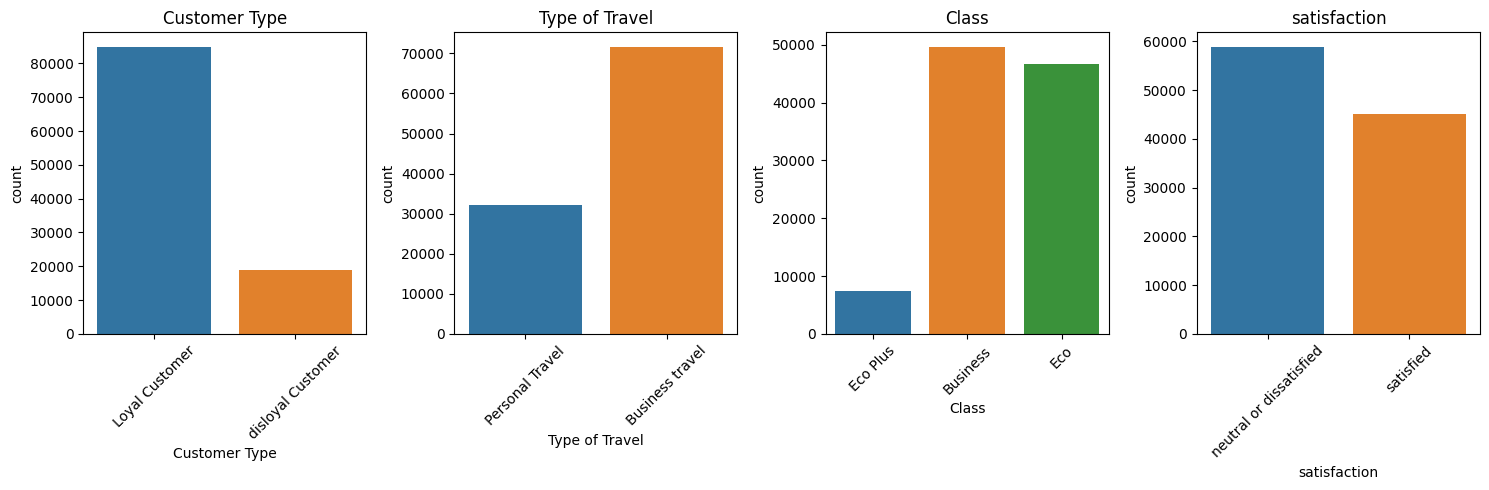

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, column in enumerate(categorical_columns.columns):
    ax = axes[i]
    sns.countplot(data=categorical_columns, x=column, ax=ax)
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

    1. Fill in the blanks below

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
- There is an equal number of female and male participants in the survey. </br>
- Most customers on this airline are personal travel customers and most of them purchase tickets for business class, followed by Eco class. </br>
- A large proportion of customers felt neutral or dissatisfied with the airline.
</div>

7. Create some count plots of numerical categorical columns to view how many of each unique valeue that there is? (q: what insights can we get from this?)

    1. Create a list of all of the columns that are numerical but have only a few unique values, you can do this by running 'train[col].unique()' for all columns where 'col' is the column name

In [ ]:
categoric = ['Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

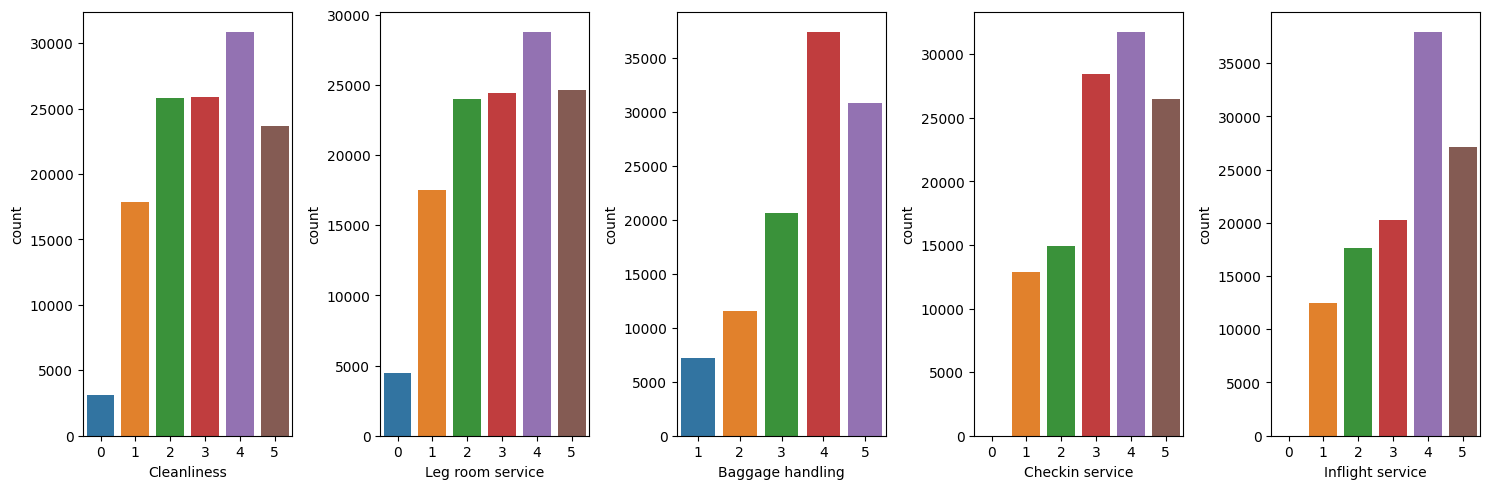

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, column in enumerate(categoric):
    col = i % 5

    ax = axes[col]
    sns.countplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

8. Create some Kernel density plots for view the distribution of continuous variables

    1. Find the numerical columns that are continuous, you can do this by running 'train[col].unique()' for all columns where 'col' is the column name

In [ ]:
numeric = ['Age',
       'Flight Distance']

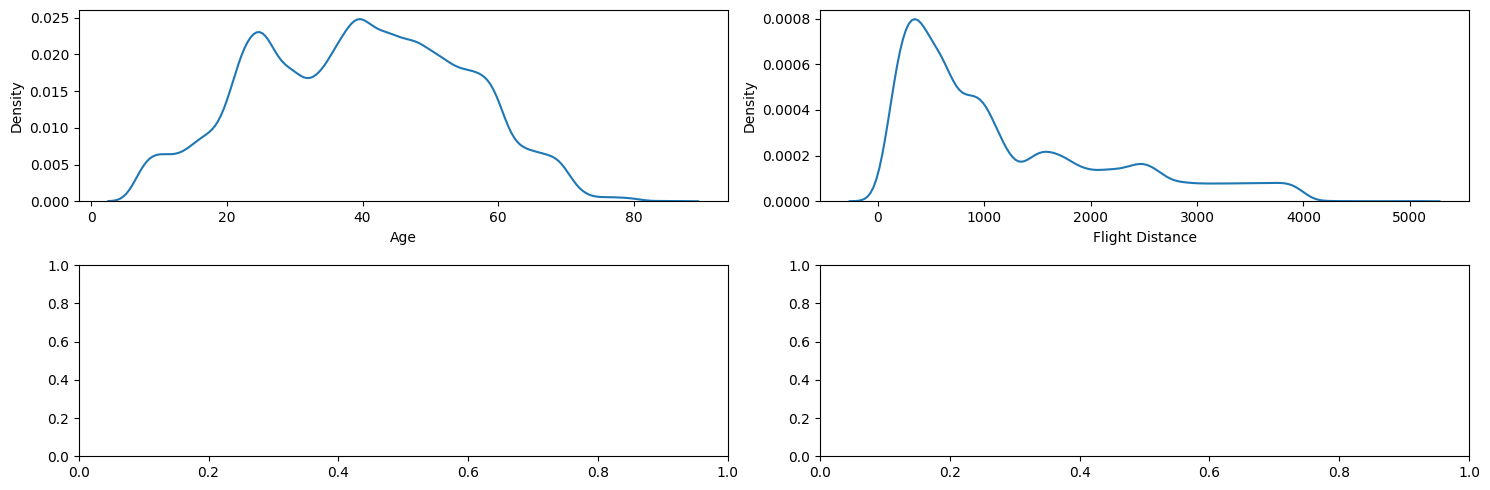

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

    2. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
The variables Flight Distance and Departure Delay in Minutes are all heavily right-skewed.
</div>

#### **🛩 Machine learning preparation**
****

In [ ]:
clean_train = train_display.copy()


    1. Fill in the gaps

9. Finding the logarithm can help in the following ways:
    - Normalize the data: Transformation can help in reducing the impact of extreme values and make the data conform more closely to a normal distribution.

    - Linearize relationships: In some cases, taking the logarithm of a variable can help linearize relationships between variables, making them more suitable for linear regression or other linear-based models.

    - Reduce skewness: Skewed data can violate the assumptions of certain models. By applying the logarithm transformation, you can reduce the skewness and make the data more standardised.

    2. From the graphs in section 8, make a list of the categories that were skewed and assign them to a variable called right_skewed

In [ ]:
right_skewed = ['Flight Distance']

In [ ]:
# Normalize the numeric variables
for x in right_skewed:
    clean_train[x] = np.log(clean_train[x])

clean_train

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,70172,0,13,1,2,6.131226,3,3,3,5,5,4,3,4,4,5,5,0
1,5047,1,25,0,0,5.459586,3,3,3,1,1,1,5,3,1,4,1,0
2,110028,0,26,0,0,7.040536,2,2,5,5,5,4,3,4,4,4,5,1
3,24026,0,25,0,0,6.331502,2,5,2,2,2,2,5,3,1,4,2,0
4,119299,0,61,0,0,5.365976,3,3,5,5,3,3,4,4,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,1,23,0,1,5.257495,2,2,2,2,2,3,1,4,2,3,2,0
103900,73097,0,49,0,0,7.760893,4,4,4,5,5,5,5,5,5,5,4,1
103901,68825,1,30,0,0,7.598399,1,1,1,5,4,3,2,4,5,5,4,0
103902,54173,1,22,0,1,6.907755,1,1,1,1,1,4,5,1,5,4,1,0


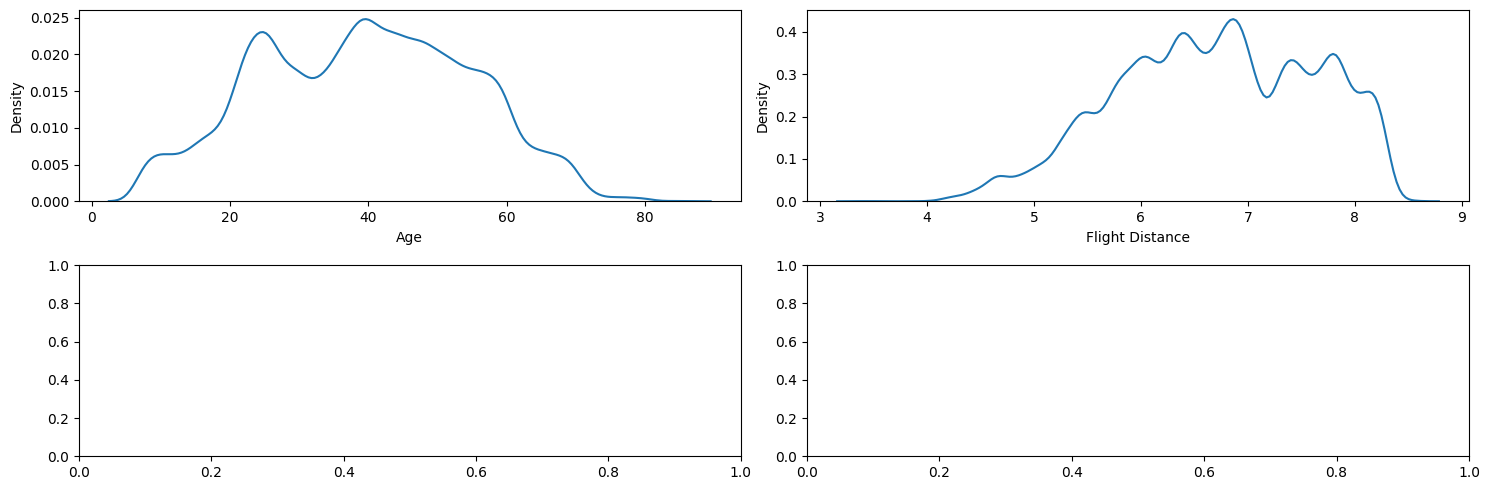

In [ ]:
numeric = ["Age", "Flight Distance"]

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.kdeplot(data= clean_train, x=column, ax=ax)

plt.tight_layout()
plt.show()

    1. Fill in the gaps

<div class="alert alert-block alert-info" style="background-color: #C2F3D3; color: black;">
______________ and _____________ are now more normally distributed.
</div>

In [ ]:
clean_train.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,70172,0,13,1,2,6.131226,3,3,3,5,5,4,3,4,4,5,5,0
1,5047,1,25,0,0,5.459586,3,3,3,1,1,1,5,3,1,4,1,0
2,110028,0,26,0,0,7.040536,2,2,5,5,5,4,3,4,4,4,5,1
3,24026,0,25,0,0,6.331502,2,5,2,2,2,2,5,3,1,4,2,0
4,119299,0,61,0,0,5.365976,3,3,5,5,3,3,4,4,3,3,3,1


    1.Define the X and Y variables (hint: x is all categories apart from the id and the one that we are trying to predict and the y variables is only the column that we are trying to predict)

In [ ]:
copy_clean_train = clean_train.copy()
X = copy_clean_train.drop('id', axis = 1)
X = X.drop('satisfaction', axis = 1)
y = clean_train['satisfaction']

X.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,13,1,2,6.131226,3,3,3,5,5,4,3,4,4,5,5
1,1,25,0,0,5.459586,3,3,3,1,1,1,5,3,1,4,1
2,0,26,0,0,7.040536,2,2,5,5,5,4,3,4,4,4,5
3,0,25,0,0,6.331502,2,5,2,2,2,2,5,3,1,4,2
4,0,61,0,0,5.365976,3,3,5,5,3,3,4,4,3,3,3


9. We next need to normalize the numeric variables, this is the process of transforming the variables to a common scale or range to ensure a fair comparison between variables and prevent one variable from dominating others due to its larger magnitude, we will normalize using the standard scalar object

    1. Assign a variable named scaler to the object 'StandardScaler()'


In [ ]:
scaler = StandardScaler()

In [ ]:

numeric_col = ["Age", "Flight Distance"]

# Handle the problematic values in X
for numeric_val in numeric_col:
    X[numeric_val] = X[numeric_val].replace([np.inf, -np.inf], np.nan)
    X[numeric_val] = X[numeric_val].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_val].fillna(X[numeric_val].mean(), inplace=True)  # Replace NaN values with column mean


    2. Scale all of the values in X[numeric_col] by using the method scaler.fit_transform(__) and assign it to the variable X[numerical_col]

In [ ]:
X[numeric_col] = scaler.fit_transform(X[numeric_col])

10. We now want to turn the categorical columns into a machine readable format so it can be interpretted by our model, we do this using the Label encoder object

    1. Assign a variable called le to the object LabelEncoder()

In [ ]:
le = LabelEncoder()

    2. Assign a list of the non-numerical categorical columns to a variable called 'cat_col'

In [ ]:
cat_col = ['Type of Travel', 'Class', 'Customer Type']

    3. use a for loop to re-assign each categorical column X[cols] to its label encoded version by using le.fit_transform(X[cols])

In [ ]:
for col in cat_col:
  X[col] = le.fit_transform(X[col])

11. We also want to do the same thing to our target variable

    1. Do the same thing to our variable y:
       a. Assign the object LabelEncoder() to le

In [ ]:
le = LabelEncoder()

        b. Use fit_transform to change the variable y

In [ ]:
y = le.fit_transform(y)

12. We are then splitting our training dataset into train and a test datasets, this will allow us to evaluate which model is best for predicting, we also cannot use the actual test dataset because this results in data leakage, data leakage occurs when information from the testing set is inadvertently used during model training. This can lead to overly optimistic performance estimates

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train shape: ", X_train.shape)
print(f"X_val shape: ", X_val.shape)

X_train shape:  (83123, 16)
X_val shape:  (20781, 16)


#### **🛩 Modelling**
****

    1. fill in the gaps

- Accuracy: The overall correctness of a classification model in predicting the correct labels.

- F1 Score: A measure of a model's accuracy that considers both precision and recall, providing a better assessment.

- Precision: The proportion of true positive predictions (correctly predicted positives) out of all positive predictions made.

- Recall: The proportion of true positive predictions (correctly predicted positives) out of all actual positive instances.

- AUC (Area Under the Curve): The measure of a model's performance by calculating the area under the receiver operating characteristic (ROC) curve.

    2. Assign the object 'LogisticRegression()' to the variable lr

In [ ]:
my_model = XGBClassifier(n_estimators=500, learning_rate=0.1,n_jobs=6)


    3. Use the lr.fit() method to train the algorithm on the X_train and y_train lists

In [ ]:
my_model.fit(X_train, y_train,early_stopping_rounds=5,
             eval_set=[(X_val, y_val)],
             verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=6, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

    4. Use the lr.predict() method to predict the values of X_val and assign this to a variable called y_pred

In [ ]:
y_pred = my_model.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_val, y_pred)
print("AUC Score:", auc_score)


F1_score = f1_score(y_val, y_pred)
print("F1 Score:", F1_score)

Recall_score = recall_score(y_val, y_pred)
print("Recall Score:", Recall_score)

Precision_score = precision_score(y_val, y_pred)
print("Precision Score:", Precision_score)



Accuracy: 0.9635724941051922
AUC Score: 0.9612994903571084
F1 Score: 0.9573833248888137
Recall Score: 0.9442531926707385
Precision Score: 0.9708837634163051


#### **🛩 Test prediction**
****

15. we now implement all of our necessary changes to the test dataset that we had previously done to the train dataset as follows


In [ ]:
test.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,19556,Loyal Customer,52,Business travel,Eco,160,5,3,4,3,5,5,5,5,2,5,5
1,90035,Loyal Customer,36,Business travel,Business,2863,1,3,4,5,4,4,4,4,3,4,5
2,12360,disloyal Customer,20,Business travel,Eco,192,2,2,2,2,2,4,1,3,2,2,2
3,77959,Loyal Customer,44,Business travel,Business,3377,0,0,4,4,1,1,1,1,3,1,4
4,36875,Loyal Customer,49,Business travel,Eco,1182,2,4,1,2,2,2,2,2,4,2,4


**a.** Taking the natural logarithm of the numerical variables that are skewed, the is done to make it more suitable for model predicting and reduce skewedness

    1. Take the natural logarithm of the 2 continuous numerical variables (hint: You previously did this to the train dataset)

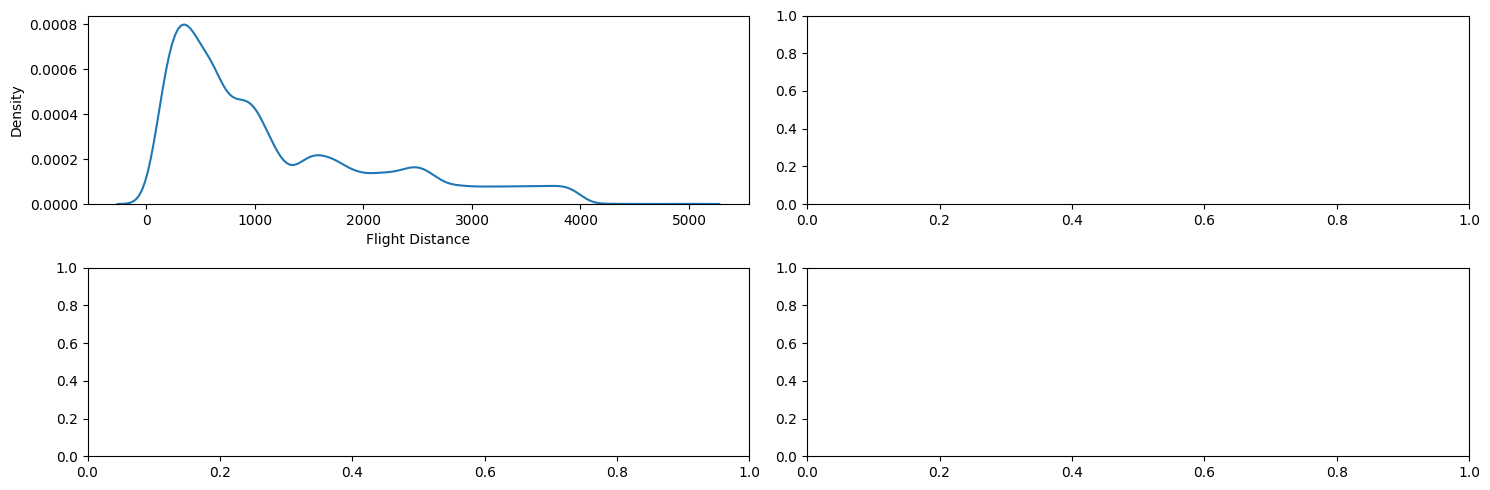

In [ ]:
continuous = ['Flight Distance']
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(continuous):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
right_skewed = ['Flight Distance']
for x in right_skewed:
    test[x] = np.log(test[x])



**d.** Define the columns for our x and y

    2.Define the X and Y variables (hint: x is all categories apart from the id and the one that we are trying to predict and the y variables is only the column that we are trying to predict)

In [ ]:
X = test.drop('id', axis = 1)
X.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Loyal Customer,52,Business travel,Eco,5.075174,5,3,4,3,5,5,5,5,2,5,5
1,Loyal Customer,36,Business travel,Business,7.959625,1,3,4,5,4,4,4,4,3,4,5
2,disloyal Customer,20,Business travel,Eco,5.257495,2,2,2,2,2,4,1,3,2,2,2
3,Loyal Customer,44,Business travel,Business,8.124743,0,0,4,4,1,1,1,1,3,1,4
4,Loyal Customer,49,Business travel,Eco,7.074963,2,4,1,2,2,2,2,2,4,2,4


**e.** We now normalise the numerical variables

    1. Assign a variable named scaler to the object 'StandardScaler()'

In [ ]:
scaler = StandardScaler()

In [ ]:

numeric_col = ["Age", "Flight Distance"]

# Handle the problematic values in X
for numeric_val in numeric_col:
    X[numeric_val] = X[numeric_val].replace([np.inf, -np.inf], np.nan)
    X[numeric_val] = X[numeric_val].clip(lower=-1e6, upper=1e6)  # Replace extremely large values with a suitable range
    X[numeric_val].fillna(X[numeric_val].mean(), inplace=True)  # Replace NaN values with column mean

X[numeric_col] = scaler.fit_transform(X[numeric_col])

**f.** We now encode our categorical variables

    1. Assign a variable called le to the object LabelEncoder()

In [ ]:
le = LabelEncoder()

    2. Assign a list of the non-numerical categorical columns to a variable called 'cat_col'

In [ ]:
cat_col = ['Type of Travel', 'Class', 'Customer Type']

    3. use a for loop to re-assign each categorical column X[cols] to its label encoded version by using le.fit_transform(X[cols])

In [ ]:
for col in cat_col:
  X[col] = le.fit_transform(X[col])

    1. Do the same thing to our variable y:
       a. Assign the object LabelEncoder() to le

In [ ]:
le = LabelEncoder()

        b. Use fit_transform to change the variable y

In [ ]:
y = le.fit_transform(y)

16. Lastly we used our pretrained model to predict whetehr airline passengers were satisfied or not from the test dataset and retreive the key metrics for our model

    1. Now we use the lr.predict() method to predict y using X. Assign the output of this to a variable called y_pred

In [ ]:
y_pred = my_model.predict(X)

### **🛩 Submission**
To create your submission, we will create a new file called final_submission.csv

Run the code below to find an example of what the submission should look like:

In [ ]:
url_sample_submission = 'https://raw.githubusercontent.com/MagisV/Airline-Passenger-Satisfaction-Data/main/sample_submission.csv'
sample_submission = pd.read_csv(url_sample_submission)

In [ ]:
sample_submission.head()

,id,satisfaction
0,19556,1
1,90035,0
2,12360,1
3,77959,0
4,36875,1


The format has to be one cell containing the id, the other one the prediction of whether the passenger is satisfied. We will use the ids from the test dataset and our predictions generated for it to create the submission file.

In [ ]:
final_sub = pd.DataFrame({'id': test['id'], 'satisfaction': y_pred})

In [ ]:
final_sub.to_csv('final_submission.csv', index=False)

To make your submission on Kaggle, download the file by running the next cell. Open the competition, click on "Submit Predictions" on the top right and then upload the file.

In [ ]:
from google.colab import files
files.download('final_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>